In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import data (using sample data in csv format)
ratings="/Users/sage/Desktop/HP/hprs_data/ratings.csv"
interventions="/Users/sage/Desktop/HP/hprs_data/interventions.csv"

#create ratings dataframe
df_ratings = pd.read_csv(ratings, sep=',')
df_ratings.columns = ['userId', 'interId', 'rating', 'timestamp']

#create interventions dataframe
df_interventions = pd.read_csv(interventions, sep=',')
df_interventions.columns = ['interId', 'name', 'category']

In [3]:
#check interventions dataframe content
df_interventions.head()

,interId,name,category
0,1,Water,Liquids
1,2,Water-rich fruits,Foods
2,3,Leafy-green vegetables,Foods
3,4,Ginger,Herbal supplements
4,5,Chicken,Foods


In [4]:
#check ratings dataframe content
df_ratings.head()

,userId,interId,rating,timestamp
0,1,1,4.0,964982703
1,5,1,4.0,847434962
2,7,1,4.5,1106635946
3,15,1,2.5,1510577970
4,17,1,4.5,1305696483


In [5]:
#view descriptive stats for ratings
df_ratings.describe()

,userId,interId,rating,timestamp
count,2967.000000,2967.000000,2967.000000,2.967000e+03
mean,307.881362,29.778564,3.582238,1.064893e+09
std,182.695512,20.532210,1.031522,2.228723e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,150.000000,10.000000,3.000000,8.506885e+08
50%,307.000000,31.000000,4.000000,9.800517e+08
75%,469.000000,47.000000,4.000000,1.213638e+09
max,610.000000,76.000000,5.000000,1.537158e+09


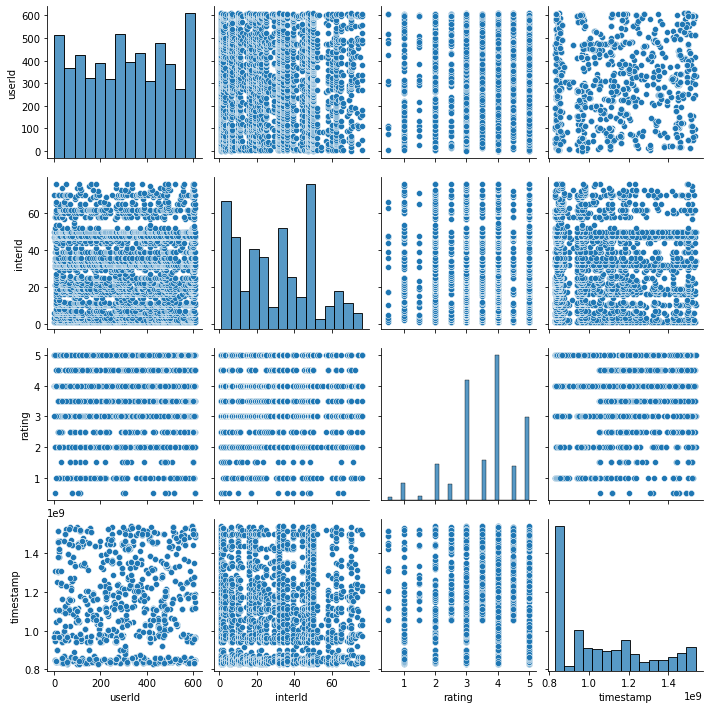

In [6]:
#view pairwise relations
sns.pairplot(df_ratings)

<AxesSubplot:>

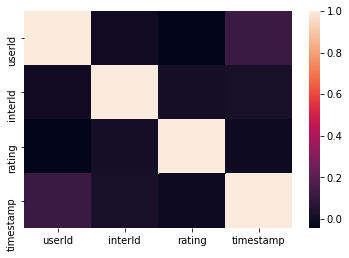

In [7]:
#view strength of correlations as heatmap
sns.heatmap(df_ratings.corr())

In [8]:
#view data types
df_ratings.dtypes

userId         int64
interId        int64
rating       float64
timestamp      int64
dtype: object

In [9]:
#check for missing values
df_ratings.isnull().sum()

userId       0
interId      0
rating       0
timestamp    0
dtype: int64

In [10]:
#check for duplicate rows
duplicate_rows_df = df_ratings[df_ratings.duplicated()]
print("duplicate rows: ", duplicate_rows_df.shape[0])

number of duplicate rows:  0


<AxesSubplot:>

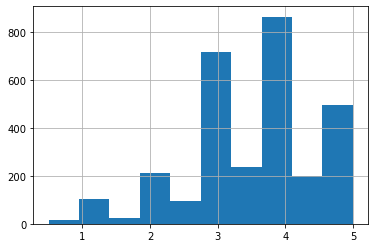

In [11]:
#view histogram of ratings distribution
df_ratings.rating.hist()

<AxesSubplot:>

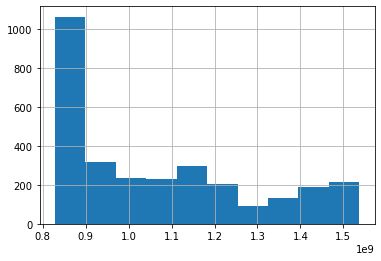

In [12]:
#view histogram of timestamp distribution
df_ratings.timestamp.hist()

In [13]:
#pivot dataframe to create matrix of user x intervention with ratings as values
df_user_inter = df_ratings.pivot(index = 'userId', columns = 'interId', values = 'rating')

#sort indices of rows and columns in ascending order
df_user_inter.sort_index(axis=0, inplace=True)
df_user_inter.sort_index(axis=1, inplace=True)

In [14]:
#check ratings matrix content
df_user_inter.head()

interId,1,2,3,4,5,6,7,8,9,10,...,66,68,69,70,71,72,73,74,75,76
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,3.0,5.0,4.0,4.0,3.0,NaN,3.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [15]:
#view descriptive stats for ratings matrix
df_user_inter.describe()

interId,1,2,3,4,5,6,7,8,9,10,...,66,68,69,70,71,72,73,74,75,76
count,215.000000,110.000000,52.000000,7.000000,49.000000,102.000000,54.000000,8.000000,16.000000,132.000000,...,9.000000,5.000000,20.00000,55.000000,5.000000,7.000000,13.000000,8.000000,5.000000,15.000000
mean,3.920930,3.431818,3.259615,2.357143,3.071429,3.946078,3.185185,2.875000,3.125000,3.496212,...,2.500000,3.400000,3.77500,3.509091,1.700000,3.214286,3.461538,4.000000,2.200000,3.400000
std,0.834859,0.881713,1.054823,0.852168,0.907148,0.817224,0.977561,1.125992,0.974679,0.859381,...,1.118034,1.140175,0.89553,1.016033,0.447214,1.286375,0.691060,0.755929,1.095445,1.198213
min,0.500000,0.500000,0.500000,1.000000,0.500000,1.000000,1.000000,1.000000,1.500000,0.500000,...,0.500000,2.000000,2.00000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
25%,3.500000,3.000000,3.000000,1.750000,3.000000,3.125000,3.000000,2.750000,2.875000,3.000000,...,2.000000,3.000000,3.00000,3.000000,1.500000,2.500000,3.000000,3.750000,1.000000,2.750000
50%,4.000000,3.500000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.500000,...,3.000000,3.000000,4.00000,4.000000,2.000000,4.000000,4.000000,4.000000,3.000000,3.500000
75%,4.500000,4.000000,4.000000,3.000000,3.500000,4.500000,4.000000,3.000000,3.250000,4.000000,...,3.000000,4.000000,4.12500,4.000000,2.000000,4.000000,4.000000,4.250000,3.000000,4.000000
max,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,5.000000,5.00000,5.000000,2.000000,4.500000,4.000000,5.000000,3.000000,5.000000


In [16]:
#view sample intervention ratings for user no. 1
df_user_inter.loc[1][:10]

interId
1     4.0
2     NaN
3     4.0
4     NaN
5     NaN
6     4.0
7     NaN
8     NaN
9     NaN
10    NaN
Name: 1, dtype: float64

In [17]:
#view which interventions user 1 rated
inter_rated_user_1 = df_user_inter.loc[1].dropna().index
inter_rated_user_1

Int64Index([1, 3, 6, 47, 50, 70], dtype='int64', name='interId')

In [18]:
#name: encode_ids
#input: ratings matrix
#output: onesimplified matrix with id in range(nb unique id) for users, interventions
#and two mapping dictionaries   
def encode_ids(data):
    #copy data
    data_encoded = data.copy()
    #create dataframe of all unique users
    users = pd.DataFrame(data_encoded.userId.unique(),columns=['userId'])
    #convert users dataframe to dictionary
    dict_users = users.to_dict()    
    inv_dict_users = {v: k for k, v in dict_users['userId'].items()}
    #create dataframe of all unique interventions
    inters = pd.DataFrame(data_encoded.interId.unique(),columns=['interId'])
    #convert intervention dataframe to dictionary
    dict_inters = inters.to_dict()  
    inv_dict_inters = {v: k for k, v in dict_inters['interId'].items()}
    #use dictionaries to populate encoded matrix
    data_encoded.userId = data_encoded.userId.map(inv_dict_users)
    data_encoded.interId = data_encoded.interId.map(inv_dict_inters)
    #return encoded matrix and mapping dictionaries
    return data_encoded, dict_users, dict_inters

In [19]:
#name: SGD
#input: ratings matrix, number of factors, alpha value, number of iterations
#output: vectors p and q (weights pu and qi)
def SGD(data, n_factors = 10, alpha = .01, n_epochs = 3):
    #encode userId's and itemId's in data
    data, dict_users, dict_inters = encode_ids(data)
    #set number of unique users and interventions
    n_users = data.userId.nunique()  
    n_inters = data.interId.nunique()  
    #randomly initialize user and item factors
    p = np.random.normal(0, .1, (n_users, n_factors))
    q = np.random.normal(0, .1, (n_inters, n_factors))

    #optimization procedure
    for epoch in range(n_epochs):
        print ('epoch: ', epoch)
        #loop over data rows
        for index in range(data.shape[0]):
            row = data.iloc[[index]]
            #current user is position in p vector
            u = int(row.userId)
            #current intervention is position in q vector
            i = int(row.interId)
            #ratings associated with user and intervention
            r_ui = float(row.rating)
            #error between predicted and known rating
            err = r_ui - np.dot(p[u], (q[i]).transpose())
           
            #update vectors pu and qi
            p_old = p[u]
            p[u] = p[u] + alpha * err * q[i]
            q[i] = q[i] + alpha * err * p_old
    #return updated vectors        
    return p, q
    
#name: estimate
#input: current user, current intervention, p vector, q vector
#output: scalar product of p[u] and q[i]
#function: estimate ratings of user for intervention
def estimate(u, i, p, q):
    #return estimation
    return np.dot(p[u], q[i].transponse())    

In [20]:
#run SGD on ratings matrix in three epochs
p, q = SGD(df_ratings)

epoch:  0
epoch:  1
epoch:  2


In [21]:
#created dataframe for imputed matrix
df_user_inter_filled = pd.DataFrame(np.dot(p, q.transpose()))
#view sample data of imputed matrix
df_user_inter_filled.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0.400314,0.205940,0.102966,0.006534,0.082337,0.118620,0.071978,0.040242,-0.010185,0.211959,...,0.013044,0.013282,0.087989,0.128213,0.000848,0.095458,0.054317,-0.023450,0.033389,0.062039
1,0.639834,0.375920,0.156411,0.043997,0.156204,0.249575,0.122022,0.097537,-0.014256,0.376074,...,0.041588,0.023246,0.203591,0.289670,-0.024134,0.080142,0.148861,0.022942,0.087769,0.170331
2,0.039926,0.031748,-0.008421,0.015660,-0.004162,0.026273,0.030340,0.023938,0.012749,0.076631,...,0.008040,0.011431,0.064212,0.013227,-0.012955,0.009243,0.019924,0.034371,0.008709,0.041436
3,0.342645,0.203890,0.082977,0.033376,0.118235,0.135193,0.033673,0.055383,-0.033839,0.201468,...,0.017913,-0.010838,0.131552,0.242305,-0.036669,-0.007745,0.104769,0.020578,0.068233,0.089016
4,0.344993,0.171221,0.107218,0.022288,0.088661,0.108600,0.053179,0.053225,-0.023925,0.208281,...,0.006747,-0.008566,0.119160,0.162172,-0.018199,0.058691,0.066857,0.001222,0.050285,0.061151


In [22]:
#generate simplified matrix and mapping dictionaries for imputed data
df_ratings_encoded, dict_users, dict_inters = encode_ids(df_ratings)

In [23]:
#update row and column names
df_user_inter_filled.rename(columns=(dict_inters['interId']), inplace=True)
df_user_inter_filled.rename(index=(dict_users['userId']), inplace=True)

#sort user ids and intervention ids
df_user_inter_filled.sort_index(axis=0, inplace=True)
df_user_inter_filled.sort_index(axis=1, inplace=True)

#view sample data matrix 
df_user_inter_filled.head()

,1,2,3,4,5,6,7,8,9,10,...,66,68,69,70,71,72,73,74,75,76
1,0.400314,0.205940,0.102966,0.006534,0.082337,0.118620,0.071978,0.040242,-0.010185,0.211959,...,0.013044,0.013282,0.087989,0.128213,0.000848,0.095458,0.054317,-0.023450,0.033389,0.062039
3,-0.232203,-0.092360,-0.039458,-0.011489,0.012582,-0.011495,-0.039376,-0.051448,0.052778,-0.244392,...,0.039768,0.011818,-0.109309,-0.179734,0.021480,-0.015432,-0.041550,0.027060,-0.018319,-0.072856
4,-0.065228,-0.075844,-0.071384,-0.010497,-0.062466,0.026426,-0.075175,0.024217,-0.070609,-0.125347,...,-0.009088,-0.008535,-0.040330,-0.027993,-0.043598,-0.067081,0.029335,-0.101451,0.001325,-0.032608
5,0.639834,0.375920,0.156411,0.043997,0.156204,0.249575,0.122022,0.097537,-0.014256,0.376074,...,0.041588,0.023246,0.203591,0.289670,-0.024134,0.080142,0.148861,0.022942,0.087769,0.170331
6,1.011718,0.619764,0.330727,0.083481,0.324846,0.433697,0.225457,0.117766,0.022438,0.592690,...,0.066688,0.049037,0.248515,0.547933,0.027734,0.073021,0.238010,0.112852,0.177983,0.334429


In [24]:
#view original ratings for user 1
df_user_inter.loc[1][:10]

interId
1     4.0
2     NaN
3     4.0
4     NaN
5     NaN
6     4.0
7     NaN
8     NaN
9     NaN
10    NaN
Name: 1, dtype: float64

In [25]:
#view estimated ratings for user 1 
df_user_inter_filled.loc[1][:10]

1     0.400314
2     0.205940
3     0.102966
4     0.006534
5     0.082337
6     0.118620
7     0.071978
8     0.040242
9    -0.010185
10    0.211959
Name: 1, dtype: float64

In [28]:
#create list of recommendations for user 8 based on highest ratings of interventions
recommendations = list((df_user_inter_filled.loc[8]).sort_values(ascending=False)[:10].index)
recommendations

[50, 47, 32, 1, 34, 62, 25, 36, 39, 2]

In [29]:
#display top recommendations for user 8
df_interventions[df_interventions.interId.isin(recommendations)]

,interId,name,category
0,1,Water,Liquids
1,2,Water-rich fruits,Foods
24,25,Abdominal stretching,Stretching
31,32,Bridge pose,Stretching
33,34,Naproxen sodium,Pain killers
35,36,Celecoxib,Pain killers
38,39,Bupleurum,Herbal supplements
46,47,B vitamins,Vitamins
49,50,Vitamin E,Vitamins
61,62,Meditation,Mental


In [31]:
#identify which recommendations have already been rated (and used) by user 8
already_rated = list((df_user_inter.loc[8]).sort_values(ascending=False)[:10].index)
already_rated

[50, 34, 47, 21, 11, 2, 39, 32, 10, 1]

In [32]:
#view previously rated interventions
df_interventions[df_interventions.interId.isin(already_rated)]

#REVIW OF RESULTS
#areas for improvement: increase from three epochs, three may not be sufficient,
#may be overfitting on the data, could regularize, limit range of parameters, 
#then can optimize based on these hyperparameters

,interId,name,category
0,1,Water,Liquids
1,2,Water-rich fruits,Foods
9,10,Flaxseed oil,Herbal supplements
10,11,Quinoa,Foods
20,21,Reduce red meat,Foods
31,32,Bridge pose,Stretching
33,34,Naproxen sodium,Pain killers
38,39,Bupleurum,Herbal supplements
46,47,B vitamins,Vitamins
49,50,Vitamin E,Vitamins


In [33]:
#prep to install surprise
!pip3 -V

pip 20.2.3 from /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pip (python 3.9)


In [34]:
#install surprise
conda install -c conda-forge/label/cf202003 scikit-surprise

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [35]:
#import necessary modules from surprise
from surprise import Reader, Dataset, SVD, NormalPredictor
from surprise.model_selection import cross_validate
from collections import defaultdict

#define reader
reader = Reader(rating_scale=(0.5, 5))
#set column names
data = Dataset.load_from_df(df_ratings[['userId', 'interId', 'rating']], reader)
#set SVD algorithm
algo = SVD()

#run 5-fold cross-validation
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9721  0.9231  0.8988  0.8725  0.9179  0.9169  0.0328  
MAE (testset)     0.7497  0.7356  0.7138  0.6712  0.7145  0.7170  0.0266  
Fit time          0.12    0.12    0.12    0.13    0.12    0.12    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([0.97212267, 0.92314157, 0.89877819, 0.87245098, 0.91789777]),
 'test_mae': array([0.74974658, 0.73558815, 0.71377621, 0.67117974, 0.71450985]),
 'fit_time': (0.12094902992248535,
  0.1204538345336914,
  0.1180579662322998,
  0.1289689540863037,
  0.11765909194946289),
 'test_time': (0.003131866455078125,
  0.0030028820037841797,
  0.0029158592224121094,
  0.002888917922973633,
  0.0029015541076660156)}

In [36]:
#import grid search
from surprise.model_selection import GridSearchCV

#set parameters
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005], 'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
#fit grid search with data
gs.fit(data)

#identify best RMSE score
print(gs.best_score['rmse'])

#identify combination of parameters that give best RMSE score
print(gs.best_params['rmse'])

0.9340559597969914
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [37]:
#use the algorithm that gives the best rmse
algo = gs.best_estimator['rmse']
trainset = data.build_full_trainset()
algo.fit(trainset)

In [39]:
#set new dataframe
df_data = data.df
#view new top results for user 1
df_data = df_data.join(df_interventions,how="left", on='interId',rsuffix='_', lsuffix='')
df_data[df_data['userId']==1].sort_values(by = 'rating',ascending=False)[:10]

,userId,interId,rating,interId_,name,category
2107,1,47,5.0,48.0,Omega 3 fatty acids,Supplements
2379,1,50,5.0,51.0,Flavanoids,Supplements
0,1,1,4.0,2.0,Water-rich fruits,Foods
325,1,3,4.0,4.0,Ginger,Herbal supplements
433,1,6,4.0,7.0,Turmeric,Herbal supplements
2859,1,70,3.0,71.0,Resting,Home remedies


In [40]:
#name: get_top_n
#input: list of predictions (as returned by test method of algorithm, number of interventions
#output: top recommendations as dictionary were users are keys, values are tuples of top recs
#function: identify top recommendations for users
def get_top_n(predictions, n=10):
  #map predictions to each user
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    #sort the predictions for each user and retrieve the k highest ones
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    #return top recommendations for each user
    return top_n

In [41]:
#predict ratings for all pairs (u, i) not in the training set
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

In [42]:
#create dictionary for predictions not included in training set
top_n = get_top_n(predictions, n=10)

In [43]:
#display top recs
top_n.items()

dict_items([(1, [(53, 4.075612988234363), (32, 4.016990780084641), (29, 3.9795358438245474), (58, 3.9334172552467064), (28, 3.923456363800324), (61, 3.9164192348760145), (16, 3.904144892999054), (74, 3.8983058053131985), (69, 3.887111713444657), (36, 3.872444300421063)]), (5, [(28, 4.0569619131495855), (32, 3.9974220952342607), (47, 3.9926775065516855), (29, 3.967327641578623), (16, 3.949555075761755), (6, 3.9165428857046845), (26, 3.866278050250717), (14, 3.844845968468488), (69, 3.8163727670778), (74, 3.7948097318584404)]), (7, [(47, 3.9305753646487562), (32, 3.914670433765428), (28, 3.900630302815826), (29, 3.8791314095165754), (6, 3.8542245705977503), (16, 3.819827260222006), (61, 3.818315552976818), (41, 3.8031206153970882), (36, 3.7728250248543116), (17, 3.757700895518321)]), (15, [(50, 3.8968311651629683), (32, 3.731169597251503), (29, 3.726108706485301), (58, 3.716674858335806), (6, 3.687439902701124), (16, 3.677115235876226), (28, 3.6305660349675914), (74, 3.6219838751739926),

In [44]:
#view recommended interventions for user 1
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])
    if uid == 1:
        break

1 [53, 32, 29, 58, 28, 61, 16, 74, 69, 36]


In [45]:
df_interventions[df_interventions.interId.isin([53, 32, 29, 58, 28, 61, 16, 74, 69, 36])]

,interId,name,category
15,16,Kombucha,Liquids
27,28,Yoga,Stretching
28,29,Exercise,Exercise
31,32,Bridge pose,Stretching
35,36,Celecoxib,Pain killers
52,53,Cinnamon tea,Liquids
57,58,Hormonal birth control injection,Birth control
60,61,Hormonal birth control patches,Birth control
68,69,Heat patches,Home remedies
73,74,Valerian root,Herbal supplements
